In [160]:
import requests
import pytz
import pandas as pd
import sqlite3 as db
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import scipy.optimize as opt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
%matplotlib inline

sectors = ['SPY','SSO']
sec_etf = pdr.get_data_yahoo(sectors,start='2015-4-3', end='2018-4-3')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')
sectors_r.head(10)

[*********************100%***********************]  2 of 2 downloaded


,SPY,SSO
Date,,
2015-04-07,-0.002646,-0.004733
2015-04-08,0.003377,0.006059
2015-04-09,0.004423,0.009071
2015-04-10,0.005457,0.010350
2015-04-13,-0.004523,-0.008599
2015-04-14,0.001913,0.003545
2015-04-15,0.004487,0.008868
2015-04-16,-0.000285,-0.000670
2015-04-17,-0.011504,-0.022960


In [161]:
sectors_s = sec_etf['Adj Close'].dropna(axis=0, how='any')
sectors_s.head(10)

,SPY,SSO
Date,,
2015-04-06,195.634811,64.480896
2015-04-07,195.117081,64.175735
2015-04-08,195.776016,64.564575
2015-04-09,196.642029,65.150261
2015-04-10,197.715118,65.824570
2015-04-13,196.820892,65.258553
2015-04-14,197.197418,65.489876
2015-04-15,198.082245,66.070656
2015-04-16,198.025757,66.026360


In [168]:
file = 'Borrow_2018_4_4 copy.csv'
df_etf = pd.read_csv(file)
df_etf = df_etf.reset_index().rename(columns={'#BOF':'#SYM','2018.04.04':'CUR','13:00:02':'NAME','Unnamed: 3':'CON',
                                              'Unnamed: 4':'ISIN','Unnamed: 5':'REBATERATE','Unnamed: 6':'FEERATE','Unnamed: 7':'AVAILABLE'})
df_etf.head()
df_etf = df_etf.set_index(['#SYM'])
print(df_etf.loc['SPY'])
print(df_etf.loc['SSO'])
print(df_etf.loc['SPY']['REBATERATE'])

index                              10443
CUR                                  USD
NAME          SPDR S&amp;P 500 ETF TRUST
CON                               756733
ISIN                        XXXXXXXF1030
REBATERATE                        1.2437
FEERATE                           0.4363
AVAILABLE                        8400000
Name: SPY, dtype: object
index                              10534
CUR                                  USD
NAME          PROSHARES ULTRA S&amp;P500
CON                             39622943
ISIN                        XXXXXXXR1077
REBATERATE                       -1.4972
FEERATE                           3.1772
AVAILABLE                         550000
Name: SSO, dtype: object
1.2437


In [163]:
import numpy as np
L = []
S = []
M = []
beta  = 1
r = 1.2437 #rebate rate of underlying ETF
f = 0.4363 #fee rate of underlying ETF
for j in range(len(sectors_s)):
    #ret_s = sectors_s['SSO'][i] - sectors_s['SSO'][i-1]
    S.append(sectors_s.iloc[j]['SPY']) # underlying ETF
    L.append(sectors_s.iloc[j]['SSO']) # leveraged ETF
#print(S)
for i in range(len(S)):
    interest = (1 - beta) * r/100 * ((i+1)/252) - f/100 * (i+1)/252 #r is rebate rate, f is fee rate
    volatility = -0.5 * (beta **2 - beta)* np.std(S[:i]) *i/252
    q = (S[i]/S[0]) **(beta) * np.exp(interest + volatility)
    M.append(q * L[0]) # Model's leveraged ETF
print(M)

[nan, 64.30802625414927, 64.52408542549014, 64.80838492088658, 65.16092053660029, 64.86508765310062, 64.98805190168116, 65.27852380180433, 65.25877816600563, 64.5069534334927, 65.09521514309941, 65.01654778755346, 65.3349102455765, 65.49818107824034, 65.64903250631787, 65.37494747518241, 65.58163437865053, 65.31065195207479, 64.65509139563402, 65.3549152916433, 65.53987453126717, 64.78819099745247, 64.52036275475565, 64.77664231036682, 65.6283572631722, 65.31401329011138, 65.11750130027501, 65.12877989487804, 65.80678597710553, 65.87696464905973, 66.08048605008908, 66.05763776271158, 66.00997480216402, 66.20108317453469, 66.04179702353784, 65.33061131110468, 65.94959411673946, 65.87404799283424, 65.46363039938832, 65.59582107822251, 65.52957730135358, 65.70206288032286, 65.14598138600043, 65.03324856540223, 64.61358611926453, 64.62177414475504, 65.39877427487467, 65.61153495725291, 65.07720589098615, 64.81879808022673, 65.17415272572595, 65.27841306171464, 65.93443282350957, 65.6622962

/Users/zhousq/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/zhousq/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/zhousq/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [164]:
Date = sectors_r.index
print(len(Date))
print(len(L[1:]))
print(len(M[1:]))
df = pd.DataFrame({'Date':Date,'Leveraged ETF':L[1:], 'Model Leveraged ETF':M[1:]})
print(df)
print(len(Date))

754
754
754
          Date  Leveraged ETF  Model Leveraged ETF
0   2015-04-07      64.175735            64.308026
1   2015-04-08      64.564575            64.524085
2   2015-04-09      65.150261            64.808385
3   2015-04-10      65.824570            65.160921
4   2015-04-13      65.258553            64.865088
5   2015-04-14      65.489876            64.988052
6   2015-04-15      66.070656            65.278524
7   2015-04-16      66.026360            65.258778
8   2015-04-17      64.510422            64.506953
9   2015-04-20      65.691666            65.095215
10  2015-04-21      65.529259            65.016548
11  2015-04-22      66.164169            65.334910
12  2015-04-23      66.493942            65.498181
13  2015-04-24      66.794167            65.649033
14  2015-04-27      66.233086            65.374947
15  2015-04-28      66.661278            65.581634
16  2015-04-29      66.095261            65.310652
17  2015-04-30      64.810669            64.655091
18  2015-05-01     

In [165]:
df.set_index('Date')

,Leveraged ETF,Model Leveraged ETF
Date,,
2015-04-07,64.175735,64.308026
2015-04-08,64.564575,64.524085
2015-04-09,65.150261,64.808385
2015-04-10,65.824570,65.160921
2015-04-13,65.258553,64.865088
2015-04-14,65.489876,64.988052
2015-04-15,66.070656,65.278524
2015-04-16,66.026360,65.258778
2015-04-17,64.510422,64.506953


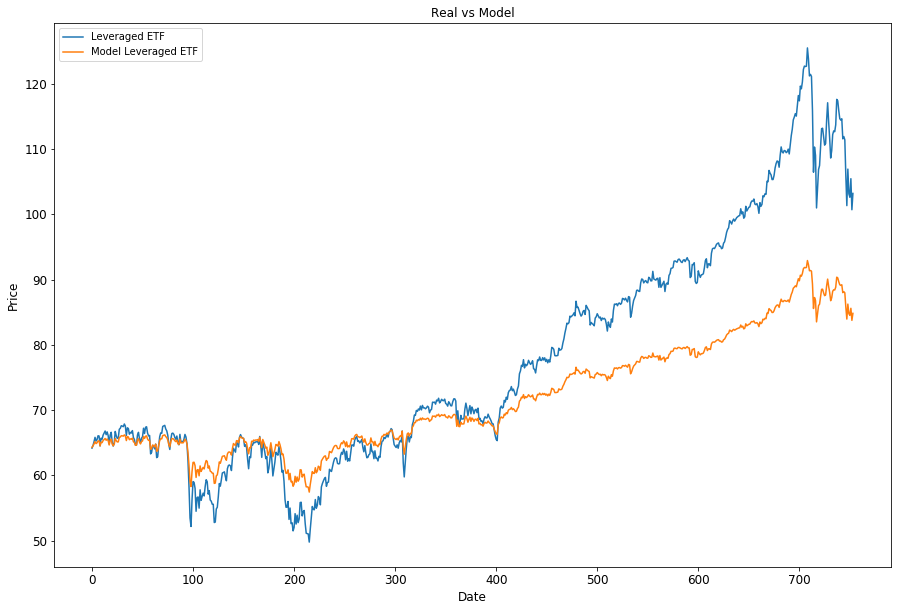

In [166]:
import pandas as pd
import matplotlib.pyplot as plt    
#plt.style.use('ggplot')
df.set_index('Date')
ax = df[['Leveraged ETF','Model Leveraged ETF']].plot(title ='Real vs Model',figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Price',fontsize=12)
plt.show()

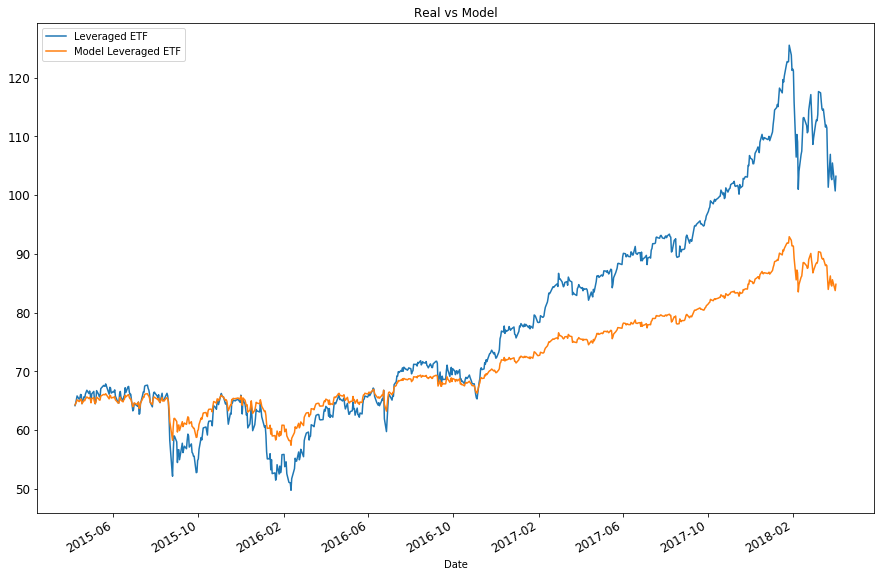

In [167]:
df.set_index('Date').plot(title ='Real vs Model',figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Price',fontsize=12)
plt.show()

In [171]:
sectors = ['IYF','UYG']
sec_etf = pdr.get_data_yahoo(sectors,start='2015-4-17', end='2018-4-12')
#print(sec_etf)
sectors_s = sec_etf['Adj Close'].dropna(axis=0, how='any')
file = 'Borrow_2018_4_4 copy.csv'
df_etf = pd.read_csv(file)
df_etf = df_etf.reset_index().rename(columns={'#BOF':'#SYM','2018.04.04':'CUR','13:00:02':'NAME','Unnamed: 3':'CON',
                                              'Unnamed: 4':'ISIN','Unnamed: 5':'REBATERATE','Unnamed: 6':'FEERATE','Unnamed: 7':'AVAILABLE'})



file = 'Borrow_2018_4_4 copy.csv'
df_etf = pd.read_csv(file)
df_etf = df_etf.reset_index().rename(columns={'#BOF':'#SYM','2018.04.04':'CUR','13:00:02':'NAME','Unnamed: 3':'CON',
                                              'Unnamed: 4':'ISIN','Unnamed: 5':'REBATERATE','Unnamed: 6':'FEERATE','Unnamed: 7':'AVAILABLE'})
df_etf.head()
df_etf = df_etf.set_index(['#SYM'])
print(df_etf.loc['IYF'])
print(df_etf.loc['UYG'])
print(df_etf.loc['IYF']['REBATERATE'])

L = []
S = []
M = []
beta  = 1
r = df_etf.loc['IYF']['REBATERATE'].values #rebate rate of underlying ETF
f = df_etf.loc['IYF']['FEERATE'].values #fee rate of underlying ETF
print(type(r))
print(f)
for j in range(len(sectors_s)):
    #ret_s = sectors_s['SSO'][i] - sectors_s['SSO'][i-1]
    S.append(sectors_s.iloc[j]['IYF']) # underlying ETF
    L.append(sectors_s.iloc[j]['UYG']) # leveraged ETF
#print(S)
for i in range(len(S)):
    interest = (1 - beta) * r/100 * ((i+1)/252) - f/100 * (i+1)/252 #r is rebate rate, f is fee rate
    volatility = -0.5 * (beta **2 - beta)* np.std(S[:i]) *i/252
    q = (S[i]/S[0]) **(beta) * np.exp(interest + volatility)
    M.append(q * L[0]) # Model's leveraged ETF

Date = sectors_r.index
df = pd.DataFrame({'Date':Date,'Leveraged ETF':L[1:], 'Model Leveraged ETF':M[1:]})
df.set_index('Date')
df.set_index('Date').plot(title ='Real vs Model',figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Price',fontsize=12)
plt.show()

[*********************100%***********************]  2 of 2 downloaded
index                                6123
CUR                                   USD
NAME          ISHARES U.S. FINANCIALS ETF
CON                               9579962
ISIN                         XXXXXXX77884
REBATERATE                        -0.6206
FEERATE                            2.3006
AVAILABLE                          150000
Name: IYF, dtype: object
index                              11647
CUR                                  USD
NAME          PROSHARES ULTRA FINANCIALS
CON                             74262522
ISIN                        XXXXXXXX6334
REBATERATE                       -2.9435
FEERATE                           4.6235
AVAILABLE                          70000
Name: UYG, dtype: object
-0.6206


AttributeError: 'str' object has no attribute 'values'

In [125]:
df_etf.head

<bound method NDFrame.head of        index   #SYM    CUR                          NAME        CON  \
0          0   #SYM    CUR                          NAME        CON   
1          1   #EOF  12534                           NaN        NaN   
2          2      A    USD      AGILENT TECHNOLOGIES INC    1715006   
3          3     AA    USD                    ALCOA CORP  251962528   
4          4   AABA    USD                    ALTABA INC  278946664   
5          5  AABVF    USD   ABERDEEN INTERNATIONAL INC.   60152167   
6          6    AAC    USD              AAC HOLDINGS INC  169041192   
7          7  AACAY    USD  AAC TECHNOLOGIES H-UNSPON AD   54939868   
8          8   AACS    USD   AMERICAN COMMERCE SOLUTIONS   30207299   
9          9  AACTF    USD  AURORA SOLAR TECHNOLOGIES IN  195675323   
10        10   AADR    USD   ADVISORSHARES DORSEY WRIGHT   77459165   
11        11   AAEH    USD      ALL AMERICAN ENERGY CORP  296051106   
12        12   AAGC    USD        ALL AMERICAN 

In [130]:
print(sectors_r)

                 IYF       UYG
Date                          
2015-04-20  0.004843  0.008786
2015-04-21 -0.003363 -0.006378
2015-04-22  0.008547  0.016357
2015-04-23  0.000334  0.001426
2015-04-24 -0.001895 -0.004340
2015-04-27 -0.003351 -0.007900
2015-04-28  0.004818  0.010435
2015-04-29 -0.001003 -0.001563
2015-04-30 -0.009377 -0.016875
2015-05-01  0.008001  0.013220
2015-05-04  0.007602  0.016121
2015-05-05 -0.007877 -0.016672
2015-05-06 -0.004585 -0.007521
2015-05-07  0.007527  0.014053
2015-05-08  0.014496  0.027308
2015-05-11 -0.004287 -0.007009
2015-05-12 -0.002870 -0.006193
2015-05-13  0.000111  0.000804
2015-05-14  0.010294  0.018814
2015-05-15 -0.004054 -0.006440
2015-05-18  0.006051  0.010384
2015-05-19  0.005030  0.011783
2015-05-20 -0.003264 -0.007246
2015-05-21 -0.003166 -0.004693
2015-05-22 -0.000329 -0.001833
2015-05-26 -0.008873 -0.017319
2015-05-27  0.008952  0.017490
2015-05-28 -0.000547 -0.001443
2015-05-29 -0.008768 -0.017608
2015-06-01  0.002654  0.004013
...     

In [136]:
df_etf.loc[df_etf['#SYM'].isin(['IYF','UYG'][])]

,index,#SYM,CUR,NAME,CON,ISIN,REBATERATE,FEERATE,AVAILABLE
6123,6123,IYF,USD,ISHARES U.S. FINANCIALS ETF,9579962,XXXXXXX77884,-0.6206,2.3006,150000
11647,11647,UYG,USD,PROSHARES ULTRA FINANCIALS,74262522,XXXXXXXX6334,-2.9435,4.6235,70000


In [141]:
df_etf.loc[df_etf['#SYM'].isin(['IYF','UYG'])]

,index,#SYM,CUR,NAME,CON,ISIN,REBATERATE,FEERATE,AVAILABLE
6123,6123,IYF,USD,ISHARES U.S. FINANCIALS ETF,9579962,XXXXXXX77884,-0.6206,2.3006,150000
11647,11647,UYG,USD,PROSHARES ULTRA FINANCIALS,74262522,XXXXXXXX6334,-2.9435,4.6235,70000


In [153]:
df_etf.loc[df_etf['#SYM'].isin(['IYF'])]['REBATERATE'].values[0]

'-0.6206'

In [150]:
print(type(df_etf.loc[df_etf['#SYM'].isin(['IYF'])]['REBATERATE']))

<class 'pandas.core.series.Series'>
